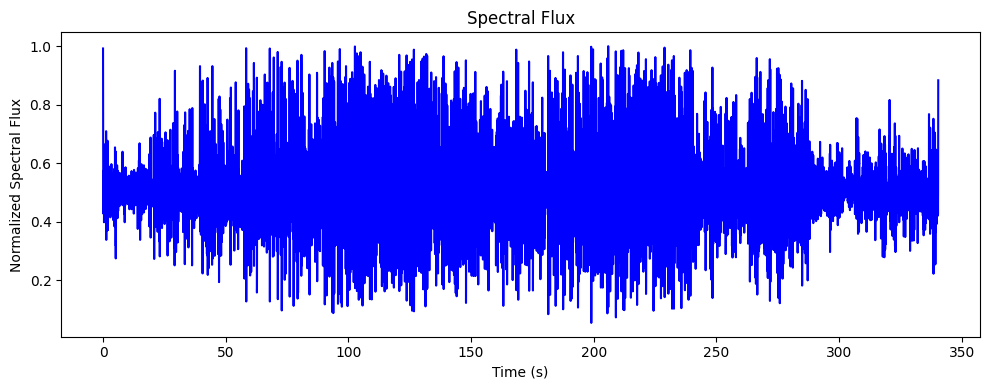

In [1]:
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load audio file
audio_file = r"C:\Users\bajpa\OneDrive\Desktop\Sid Sriram at Chennaiyil Thiruvaiyaru Festival - Nila Kaigirathu Maruvarthai Pesathe [TubeRipper.com].mp3"
y, sr = librosa.load(audio_file)

# Calculate spectrogram
spec = np.abs(librosa.stft(y))

# Calculate spectral flux
spectral_flux = np.sum(np.diff(spec, axis=1) > 0, axis=0)

# Normalize spectral flux
spectral_flux = spectral_flux/np.max(spectral_flux)

# Plot the spectral flux

plt.figure(figsize=(10, 4))
plt.plot(librosa.times_like(spectral_flux), spectral_flux, color='b')
plt.title('Spectral Flux')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Spectral Flux')
plt.tight_layout()
plt.show()

In [2]:
ipd.Audio(audio_file, rate=sr)

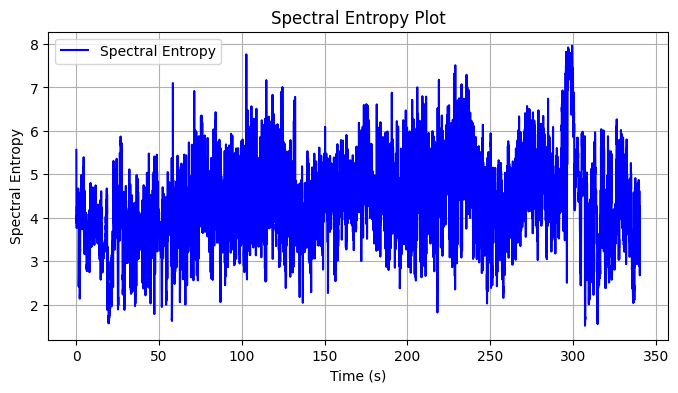

Spectral Entropy: [5.562024  4.776066  4.1999063 ... 3.3402567 3.871005  4.181309 ]


In [3]:
def spectral_entropy_detection(audio_file, frame_length=2048, hop_length=512):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y, n_fft=frame_length, hop_length=hop_length)

    # Compute power spectrogram
    power_spectrogram = np.abs(D)**2

    # Normalize power spectrogram
    normalized_power_spectrogram = power_spectrogram / np.sum(power_spectrogram, axis=0)

    # Compute spectral entropy
    spectral_entropy = -np.sum(normalized_power_spectrogram * np.log2(normalized_power_spectrogram), axis=0)

    plt.figure(figsize=(8, 4))
    plt.plot(librosa.times_like(spectral_entropy), spectral_entropy, label='Spectral Entropy', color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Entropy')
    plt.title('Spectral Entropy Plot')
    plt.grid(True)
    plt.legend()
    plt.show()

    return spectral_entropy

# Example usage
spectral_entropy = spectral_entropy_detection(audio_file)
print("Spectral Entropy:", spectral_entropy)

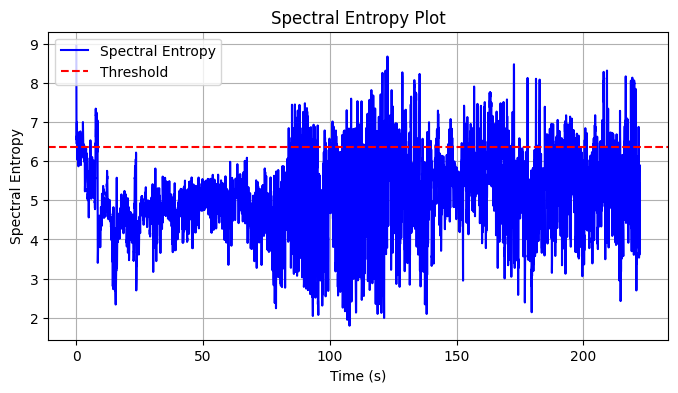

Spectral Entropy: [8.954984  7.222248  6.8119407 ... 4.813848  5.387155  5.8875914]
Threshold: 6.369595527648926


In [4]:
def spectral_entropy_detection(audio_file, frame_length=2048, hop_length=512):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y, n_fft=frame_length, hop_length=hop_length)

    # Compute power spectrogram
    power_spectrogram = np.abs(D)**2

    # Normalize power spectrogram
    normalized_power_spectrogram = power_spectrogram / np.sum(power_spectrogram, axis=0)

    # Compute spectral entropy
    spectral_entropy = -np.sum(normalized_power_spectrogram * np.log2(normalized_power_spectrogram + 1e-10), axis=0)  # Add a small epsilon to avoid log(0)

    # Extract alpha value and calculate threshold for applause detection
    alpha_value = 1.25  # Assuming alpha value for spectral entropy from the provided table
    threshold = alpha_value * np.mean(spectral_entropy)

    # Plot spectral entropy
    plt.figure(figsize=(8, 4))
    plt.plot(librosa.times_like(spectral_entropy), spectral_entropy, label='Spectral Entropy', color='b')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Entropy')
    plt.title('Spectral Entropy Plot')
    plt.grid(True)
    plt.legend()
    plt.show()

    return spectral_entropy, threshold

# Example usage
audio_file = r"C:\\Users\bajpa\Downloads\Alan Walker - Faded (Live Performance) [TubeRipper.com].mp3"
spectral_entropy, threshold = spectral_entropy_detection(audio_file)
print("Spectral Entropy:", spectral_entropy)
print("Threshold:", threshold)

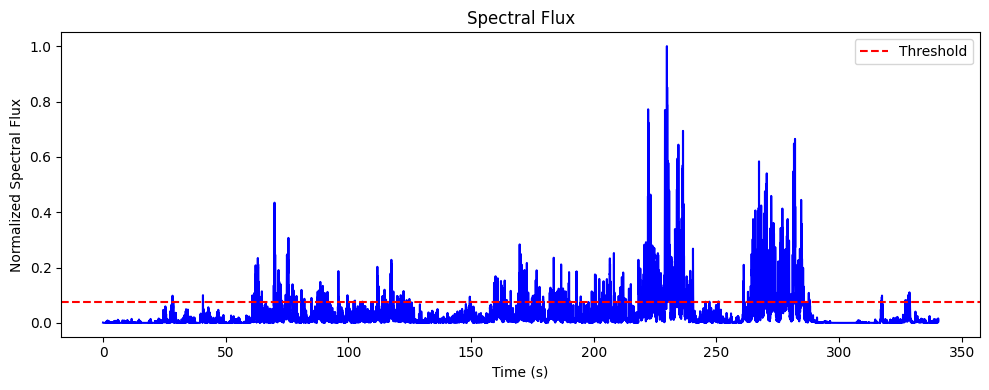

In [5]:
# Calculate spectrogram
spec = np.abs(librosa.stft(y))

# Calculate spectral flux
spectral_flux = np.sum(np.abs(np.diff(spec, axis=1))**2, axis=0)  # Using 2-norm calculation

# Normalize spectral flux
spectral_flux = spectral_flux / np.max(spectral_flux)

# Extract alpha value and calculate threshold for spectral flux
alpha_value = 2.5  # Assuming alpha value for spectral flux from the provided table
threshold = alpha_value * np.mean(spectral_flux)

# Plot the spectral flux with threshold line
plt.figure(figsize=(10, 4))
plt.plot(librosa.times_like(spectral_flux), spectral_flux, color='b')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Spectral Flux')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Spectral Flux')
plt.legend()
plt.tight_layout()
plt.show()